In [1]:
from apis.api_cruds.postgres_crud import postgres_get_all_flights_df

flights = postgres_get_all_flights_df()
flights.sort_values(by=["queryDate", "price"], inplace=True, ascending=True)

In [2]:
flights.head()

,id,price,quality,queryDate,cityFrom,cityTo,departure,arrival,dateDeparture,dateArrival,flightDuration,directFlight,flightDurationSeconds,longLayover,seatsAvailable,connection_1,connection_2,connection_3,link,flight_tag
0,1,1200,153,01-07-2022,Fortaleza,Rio de Janeiro,14:20,17:30,14-10-2022,14-10-2022,3:10,True,11400,False,1,00:00,00:00,00:00,https://www.google.com,fortaleza_rio
1,2,114,152,14-07-2022,Fortaleza,Rio de Janeiro,14:20,17:40,05-11-2022,05-11-2022,03:20,False,12000,False,1,00:00,00:00,00:00,https://www.kiwi.com/deep?affilid=mateustravel...,fortaleza_rio
2,3,114,152,14-07-2022,Fortaleza,Rio de Janeiro,14:20,17:40,03-11-2022,03-11-2022,03:20,False,12000,False,2,00:00,00:00,00:00,https://www.kiwi.com/deep?affilid=mateustravel...,fortaleza_rio
3,4,116,153,14-07-2022,Fortaleza,Rio de Janeiro,14:20,17:30,03-10-2022,03-10-2022,03:10,False,11400,False,2,00:00,00:00,00:00,https://www.kiwi.com/deep?affilid=mateustravel...,fortaleza_rio
4,5,118,155,14-07-2022,Fortaleza,Rio de Janeiro,14:20,17:30,21-10-2022,21-10-2022,03:10,False,11400,False,2,00:00,00:00,00:00,https://www.kiwi.com/deep?affilid=mateustravel...,fortaleza_rio


In [8]:
# Group by queryDate and get the minimum value
query = flights.groupby("queryDate").min().reset_index()
query

,queryDate,id,price,quality,cityFrom,cityTo,departure,arrival,dateDeparture,dateArrival,flightDuration,directFlight,flightDurationSeconds,longLayover,seatsAvailable,connection_1,connection_2,connection_3,link,flight_tag
0,01-07-2022,1,1200,153,Fortaleza,Rio de Janeiro,14:20,17:30,14-10-2022,14-10-2022,3:10,True,11400,False,1,00:00,00:00,00:00,https://www.google.com,fortaleza_rio
1,14-07-2022,2,114,152,Fortaleza,Rio de Janeiro,14:20,17:30,03-10-2022,03-10-2022,03:10,False,11400,False,0,00:00,00:00,00:00,https://www.kiwi.com/deep?affilid=mateustravel...,fortaleza_rio
2,15-07-2022,9,114,152,Fortaleza,Rio de Janeiro,14:20,17:30,03-10-2022,03-10-2022,03:10,False,11400,False,1,00:00,00:00,00:00,https://www.kiwi.com/deep?affilid=mateustravel...,fortaleza_rio


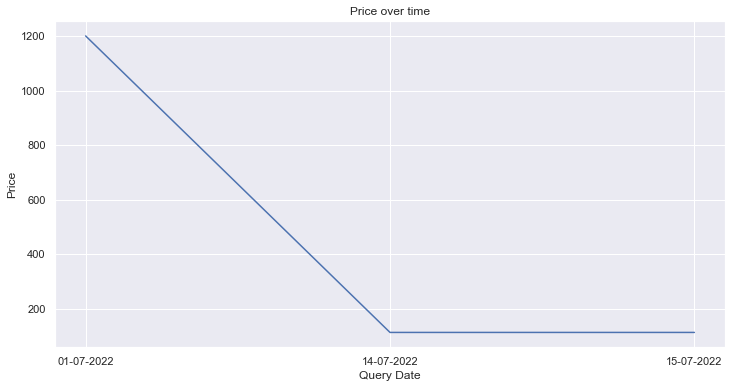

In [9]:
# Create a graph showing price over time (queryDate)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(12, 6))
plt.plot(query["queryDate"], query["price"])
plt.xlabel("Query Date")
plt.ylabel("Price")
plt.title("Price over time")
plt.show()